In [19]:
import flopy
import os
import sys
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

nmgwmdir_cal = Path('../data/Calibrated_small') #<-- removed RCH, WEL, GLO, LST from the NAM file to load much faster
workdir = Path('../work')
figdir = Path('../work/figs')
outputdir = Path('../work/output')
model_ws = Path('../work/nmgwm_seawat')



# nmgwmdir_uncal = Path('../data/Scenarios/C1/C1-12')
# nmgwmdir_uncal = Path('/Users/ianpg/Dropbox/temp_convenience/SWIlarge/data/Scenarios/C1/C1-12')
import config
from set_rc import *

##### Concentration

In [28]:
fname = model_ws.joinpath('MT3D001.UCN').as_posix()
anyvals= []
ucnobj = flopy.utils.binaryfile.UcnFile(fname,verbose=False)
# if kstpkper==None:
kstpkpers = ucnobj.get_kstpkper()
for kstpkper in kstpkpers:
    conc = ucnobj.get_data(kstpkper=kstpkper)
    anyvals.append(np.logical_and(conc < 100., conc>0.).any())

##### Heads

In [41]:
fname = model_ws.joinpath('nmgwm_seawat.hds').as_posix()
hdobj = flopy.utils.binaryfile.HeadFile(fname,verbose=False)
kstpkpers = hdobj.get_kstpkper()
hd = hdobj.get_data(kstpkper=kstpkpers[-1])
hd[hd<-100]=np.nan

In [46]:
np.argwhere(ibound==0)

NameError: name 'ibound' is not defined

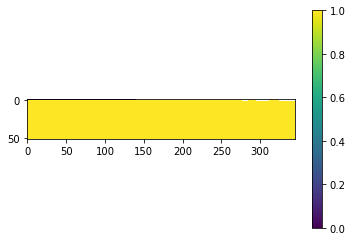

In [42]:
plt.imshow(hd[:,100,:])
plt.colorbar()

##### Mass

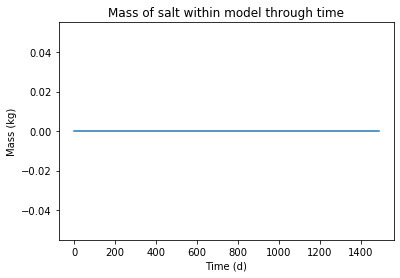

In [30]:
fname = model_ws.joinpath('MT3D001.MAS').as_posix()
mas = flopy.mt3d.Mt3dms.load_mas(fname)
f = plt.figure()
ax = f.add_subplot(1, 1, 1)
plt.xlabel('Time (d)')
plt.ylabel('Mass (kg)')
plt.title('Mass of salt within model through time')
lines = ax.plot(mas.time, mas.total_mass)


In [ ]:
mn = flopy.seawat.Seawat.load(model_ws.joinpath('nmgwm_seawat_light.nam').as_posix(),verbose=False)

Text(0.5, 0, 'Distance (m)')

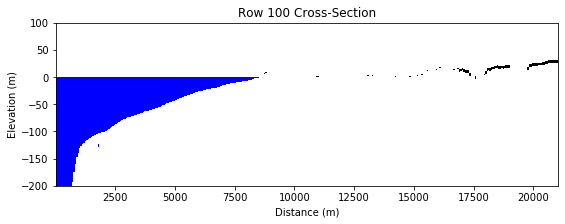

In [24]:
from matplotlib import cm

slicetype='Row'
slicenum= 100

# First step is to set up the plot
fig = plt.figure(figsize=(9, 3))
ax = fig.add_subplot(1, 1, 1)

# Next we create an instance of the PlotCrossSection class
xsect = flopy.plot.PlotCrossSection(model=mn, line={slicetype: slicenum},geographic_coords=True)
# xsect.plot_ibound()

# Then we can use the plot_grid() method to draw the grid
# The return value for this function is a matplotlib LineCollection object,
# which could be manipulated (or used) later if necessary.
# linecollection = xsect.plot_grid()
patches = xsect.plot_ibound()
a= conc
a[a>100]=np.nan
# a=np.log(a)


# lay_m = np.zeros_like(m.lpf.hk.array)
# for lay in range(lay_m.shape[0]):
#     lay_m[lay,:,:]=lay
# cmap = cm.get_cmap('tab10', lay_m.shape[0])
# csa = xsect.plot_array(a,cmap='jet',vmin=0.,vmax=35.)
# c = plt.colorbar(csa)
# # # wel = xsect.plot_bc("WEL")

t = ax.set_title('{slicetype} {slicenum} Cross-Section'.format(slicetype=slicetype,slicenum=slicenum))
plt.ylabel('Elevation (m)')
plt.ylim((-200,100))
plt.xlabel('Distance (m)')
# c.set_label('log10(hk)')
# plt.savefig(figdir.joinpath('NMGWM_orig_layers_{slicetype}{slicenum}.png'.format(slicetype=slicetype,slicenum=slicenum)),dpi=300,bbox_inches='tight')

In [ ]:
flopy.